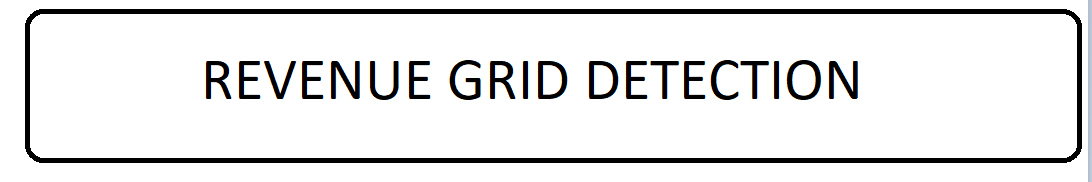

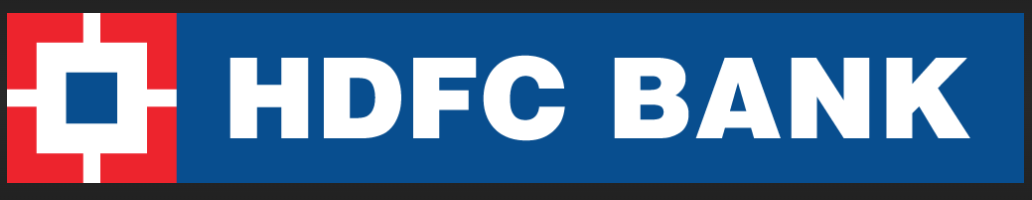

## About dataset

HDFC a well known bank wants to start HDFC STOCK BROKER where people will be able to sell and buy stocks. So HDFC decided to attract customers who already part of HDFC bank and target them by giving some additional benefits to grab them in to the Stock company.So, as  Data Scientist we need to predict the Revenue Grid which decides the Revenue class of customer

## Importing all Necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()
import warnings
warnings.filterwarnings('ignore')

## READING DATASET

In [2]:
df=pd.read_csv('REAL_TIME_PROJECT.csv')

In [3]:
df.head()

,REF_NO,children,age_band,status,occupation,occupation_partner,home_status,family_income,self_employed,self_employed_partner,...,Investment Tax Saving Bond,Home Loan,Online Purchase Amount,Revenue Grid,gender,region,Investment in Commudity,Investment in Equity,Investment in Derivative,Portfolio Balance
0,1,Zero,51-55,Partner,Manual Worker,Secretarial/Admin,Own Home,"<17,500, >=15,000",No,No,...,19.99,0.00,0.00,1,Female,Wales,74.67,18.66,32.32,89.43
1,2,Zero,55-60,Single/Never Married,Retired,Retired,Own Home,"<27,500, >=25,000",No,No,...,0.00,0.00,0.00,2,Female,North West,20.19,0.00,4.33,22.78
2,3,Zero,26-30,Single/Never Married,Professional,Other,Own Home,"<30,000, >=27,500",Yes,No,...,0.00,3.49,0.00,2,Male,North,98.06,31.07,80.96,171.78
3,5,Zero,18-21,Single/Never Married,Professional,Manual Worker,Own Home,"<15,000, >=12,500",No,No,...,0.00,0.00,0.00,2,Female,West Midlands,4.10,14.15,17.57,-41.70
4,6,Zero,45-50,Partner,Business Manager,Unknown,Own Home,"<30,000, >=27,500",No,No,...,0.00,45.91,25.98,2,Female,Scotland,70.16,55.86,80.44,235.02


## Information About Dataset

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10155 entries, 0 to 10154
Data columns (total 32 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   REF_NO                           10155 non-null  int64  
 1   children                         10155 non-null  object 
 2   age_band                         10155 non-null  object 
 3   status                           10155 non-null  object 
 4   occupation                       10155 non-null  object 
 5   occupation_partner               10155 non-null  object 
 6   home_status                      10155 non-null  object 
 7   family_income                    10155 non-null  object 
 8   self_employed                    10155 non-null  object 
 9   self_employed_partner            10155 non-null  object 
 10  year_last_moved                  10155 non-null  int64  
 11  TVarea                           10155 non-null  object 
 12  post_code         

## Descriptive statistics(Univariate analysis)

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
REF_NO,10155.0,5770.830822,3324.837813,1.00,2903.500,5770.00,8665.500,11518.00
year_last_moved,10155.0,1968.376366,180.202242,0.00,1978.000,1988.00,1994.000,1999.00
Average Credit Card Transaction,10155.0,23.441757,50.872127,0.00,0.000,0.00,23.980,662.26
Balance Transfer,10155.0,46.417760,78.477609,0.00,0.000,17.96,65.385,2951.76
Term Deposit,10155.0,27.579851,53.952550,0.00,0.000,0.00,34.990,784.82
Life Insurance,10155.0,66.242131,95.545316,0.00,0.000,31.98,94.390,2930.41
Medical Insurance,10155.0,19.142050,32.451856,0.00,0.000,0.51,27.470,591.04
Average A/C Balance,10155.0,32.084965,45.486614,0.00,0.000,14.99,46.480,626.24
Personal Loan,10155.0,26.006003,84.275743,0.00,0.000,0.00,21.480,4905.93
Investment in Mutual Fund,10155.0,42.339698,63.898899,0.00,0.000,23.48,59.555,2561.27


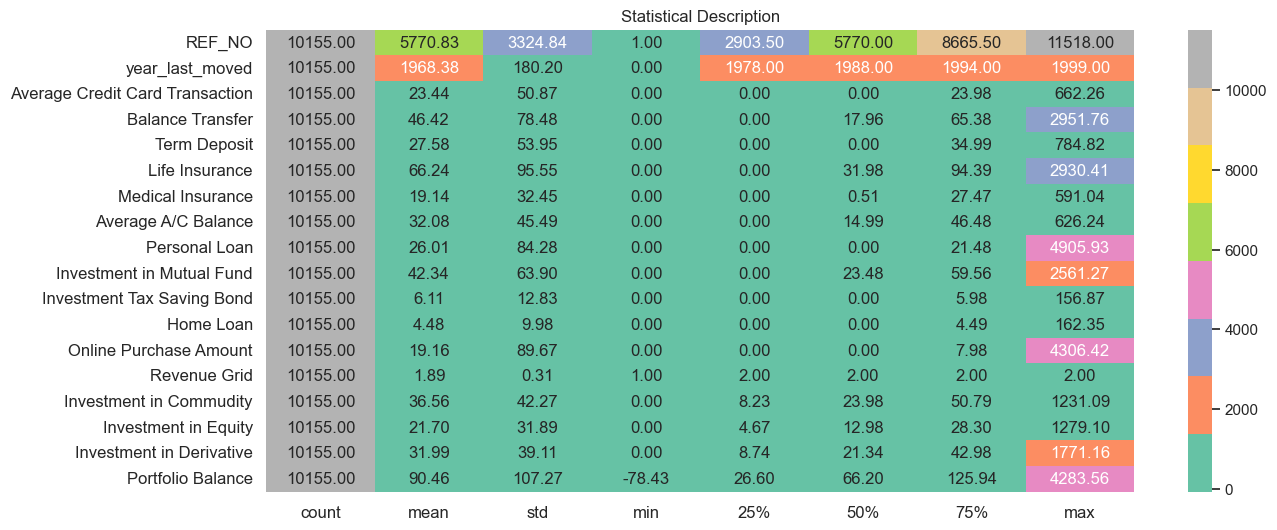

In [6]:
def descriptive_stats(df):
    desc = df.describe().round(2).T
    desc_df = pd.DataFrame(index=df.columns,columns=desc.columns,data=desc) 
    plt.figure(figsize=(14,6))
    sns.heatmap(desc, annot=True, cmap='Set2', fmt=".2f")
    plt.xticks(size = 12)
    plt.yticks(size = 12, rotation = 0)
    plt.title('Statistical Description')
    plt.show()
descriptive_stats(df)

## Checking Null values

In [7]:
df.isnull().sum()

REF_NO                             0
children                           0
age_band                           0
status                             0
occupation                         0
occupation_partner                 0
home_status                        0
family_income                      0
self_employed                      0
self_employed_partner              0
year_last_moved                    0
TVarea                             0
post_code                          0
post_area                          0
Average Credit Card Transaction    0
Balance Transfer                   0
Term Deposit                       0
Life Insurance                     0
Medical Insurance                  0
Average A/C Balance                0
Personal Loan                      0
Investment in Mutual Fund          0
Investment Tax Saving Bond         0
Home Loan                          0
Online Purchase Amount             0
Revenue Grid                       0
gender                             0
r

## Unique Values:

In [8]:
for i in df.columns:
    print('=================================',i,'==========================================')
    print()
    print(set(df[i].tolist()))

================================= REF_NO ==========================================

{1, 2, 3, 5, 6, 7, 8, 9, 10, 11, 13, 14, 15, 16, 17, 18, 19, 20, 21, 23, 26, 27, 28, 29, 30, 31, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 87, 88, 89, 90, 91, 92, 94, 96, 97, 98, 99, 100, 101, 102, 103, 104, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 194, 195, 196, 197, 198, 199, 200, 201, 202, 204, 205, 206, 207, 208, 209, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 

### Feature Engineering

In [9]:
df['Total Investments']=df['Investment in Mutual Fund']+df['Investment Tax Saving Bond']+df['Investment in Commudity']+df['Investment in Equity']+df['Investment in Derivative']

In [10]:
df['Total Investments']

0        207.59
1         24.52
2        226.08
3         81.26
4        419.30
          ...  
10150     32.34
10151    116.66
10152     66.84
10153     21.83
10154    280.42
Name: Total Investments, Length: 10155, dtype: float64

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10155 entries, 0 to 10154
Data columns (total 33 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   REF_NO                           10155 non-null  int64  
 1   children                         10155 non-null  object 
 2   age_band                         10155 non-null  object 
 3   status                           10155 non-null  object 
 4   occupation                       10155 non-null  object 
 5   occupation_partner               10155 non-null  object 
 6   home_status                      10155 non-null  object 
 7   family_income                    10155 non-null  object 
 8   self_employed                    10155 non-null  object 
 9   self_employed_partner            10155 non-null  object 
 10  year_last_moved                  10155 non-null  int64  
 11  TVarea                           10155 non-null  object 
 12  post_code         

## Drop Unnecessary columns

In [12]:
df.drop(['Investment in Commudity','Investment in Commudity','Investment in Equity','Investment in Derivative'],axis=1,inplace=True)

In [13]:
df.drop(['REF_NO','TVarea','post_code','post_area'],axis=1,inplace=True)

In [14]:
df['year_last_moved'].value_counts()

1997    680
1996    654
1994    542
1998    538
1995    492
       ... 
1921      1
1944      1
1909      1
1916      1
1911      1
Name: year_last_moved, Length: 95, dtype: int64

- Few values for year last moved are given zero which is irrelevant so we can impute it with 'mode value of the column'

In [15]:
df['year_last_moved'].mode().iloc[0]

1997

In [16]:
df['year_last_moved']=df['year_last_moved'].replace(0,df['year_last_moved'].mode().iloc[0])

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10155 entries, 0 to 10154
Data columns (total 26 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   children                         10155 non-null  object 
 1   age_band                         10155 non-null  object 
 2   status                           10155 non-null  object 
 3   occupation                       10155 non-null  object 
 4   occupation_partner               10155 non-null  object 
 5   home_status                      10155 non-null  object 
 6   family_income                    10155 non-null  object 
 7   self_employed                    10155 non-null  object 
 8   self_employed_partner            10155 non-null  object 
 9   year_last_moved                  10155 non-null  int64  
 10  Average Credit Card Transaction  10155 non-null  float64
 11  Balance Transfer                 10155 non-null  float64
 12  Term Deposit      

## Encoding

In [18]:
objects=list(df.select_dtypes(include='object').columns)

In [19]:
objects

['children',
 'age_band',
 'status',
 'occupation',
 'occupation_partner',
 'home_status',
 'family_income',
 'self_employed',
 'self_employed_partner',
 'gender',
 'region']

In [20]:
for i in objects:
    print(f'=====================Unique of {i}=========================')
    print()
    print(df[i].nunique())

=====================Unique of children=========================

5
=====================Unique of age_band=========================

13
=====================Unique of status=========================

5
=====================Unique of occupation=========================

9
=====================Unique of occupation_partner=========================

9
=====================Unique of home_status=========================

5
=====================Unique of family_income=========================

13
=====================Unique of self_employed=========================

2
=====================Unique of self_employed_partner=========================

2
=====================Unique of gender=========================

3
=====================Unique of region=========================

13


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10155 entries, 0 to 10154
Data columns (total 26 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   children                         10155 non-null  object 
 1   age_band                         10155 non-null  object 
 2   status                           10155 non-null  object 
 3   occupation                       10155 non-null  object 
 4   occupation_partner               10155 non-null  object 
 5   home_status                      10155 non-null  object 
 6   family_income                    10155 non-null  object 
 7   self_employed                    10155 non-null  object 
 8   self_employed_partner            10155 non-null  object 
 9   year_last_moved                  10155 non-null  int64  
 10  Average Credit Card Transaction  10155 non-null  float64
 11  Balance Transfer                 10155 non-null  float64
 12  Term Deposit      

In [22]:
status=pd.crosstab(index=df['self_employed'],columns=df['Revenue Grid'],margins=True)

In [23]:
status

Revenue Grid,1,2,All
self_employed,,,
No,1001,8435,9436
Yes,85,634,719
All,1086,9069,10155


<AxesSubplot:xlabel='count', ylabel='self_employed'>

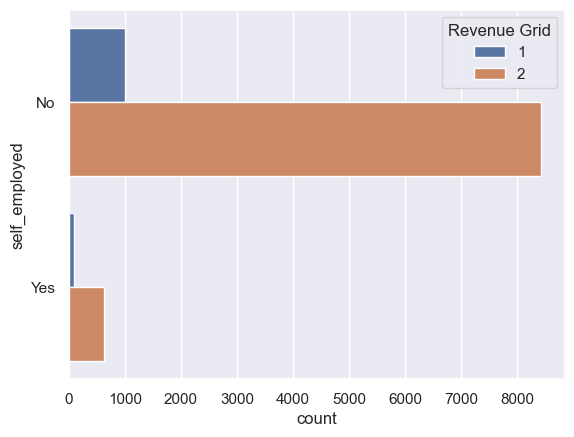

In [24]:
sns.countplot(y=df['self_employed'],hue=df['Revenue Grid'])

In [25]:
df['self_employed']=df['self_employed'].astype('category')
df['self_employed']=df['self_employed'].cat.codes

In [26]:
status=pd.crosstab(index=df['gender'],columns=df['Revenue Grid'],margins=True)
status

Revenue Grid,1,2,All
gender,,,
Female,796,6838,7634
Male,282,2204,2486
Unknown,8,27,35
All,1086,9069,10155


<AxesSubplot:xlabel='count', ylabel='gender'>

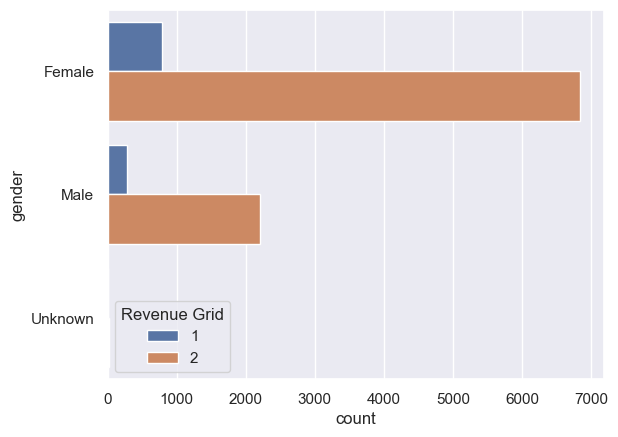

In [27]:
sns.countplot(y=df['gender'],hue=df['Revenue Grid'])

In [28]:
df['gender']=df['gender'].astype('category')
df['gender']=df['gender'].cat.codes

In [29]:
status=pd.crosstab(index=df['self_employed_partner'],columns=df['Revenue Grid'],margins=True)
status

Revenue Grid,1,2,All
self_employed_partner,,,
No,957,8069,9026
Yes,129,1000,1129
All,1086,9069,10155


<AxesSubplot:xlabel='count', ylabel='self_employed_partner'>

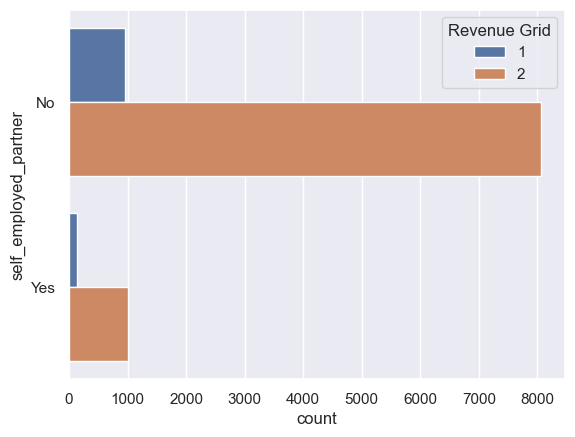

In [30]:
sns.countplot(y=df['self_employed_partner'],hue=df['Revenue Grid'])

In [31]:
df['self_employed_partner']=df['self_employed_partner'].astype('category')
df['self_employed_partner']=df['self_employed_partner'].cat.codes

In [32]:
status=pd.crosstab(index=df['children'],columns=df['Revenue Grid'],margins=True)
status

Revenue Grid,1,2,All
children,,,
1,213,1635,1848
2,172,1435,1607
3,53,420,473
4+,5,14,19
Zero,643,5565,6208
All,1086,9069,10155


<AxesSubplot:xlabel='count', ylabel='children'>

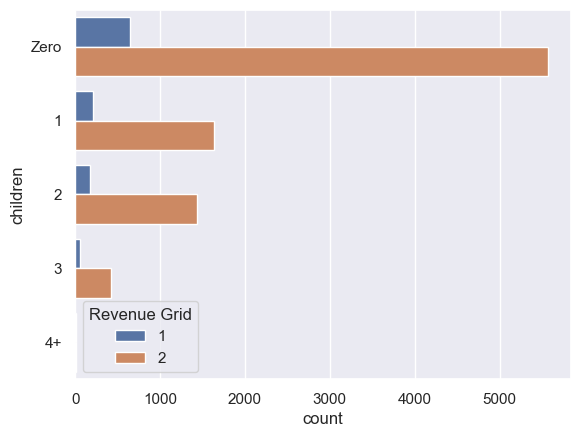

In [33]:
sns.countplot(y=df['children'],hue=df['Revenue Grid'])

In [34]:
status=pd.crosstab(index=df['age_band'],columns=df['Revenue Grid'],margins=True)
status

Revenue Grid,1,2,All
age_band,,,
18-21,11,52,63
22-25,50,406,456
26-30,99,828,927
31-35,112,949,1061
36-40,143,991,1134
41-45,123,989,1112
45-50,138,1221,1359
51-55,105,947,1052
55-60,120,927,1047


In [35]:
status=pd.crosstab(index=df['occupation'],columns=df['Revenue Grid'],margins=True)
status

Revenue Grid,1,2,All
occupation,,,
Business Manager,85,647,732
Housewife,117,1138,1255
Manual Worker,63,493,556
Other,61,476,537
Professional,282,2167,2449
Retired,220,1986,2206
Secretarial/Admin,189,1608,1797
Student,6,50,56
Unknown,63,504,567


In [36]:
status=pd.crosstab(index=df['status'],columns=df['Revenue Grid'],margins=True)
status

Revenue Grid,1,2,All
status,,,
Divorced/Separated,73,606,679
Partner,838,6871,7709
Single/Never Married,117,984,1101
Unknown,3,45,48
Widowed,55,563,618
All,1086,9069,10155


In [37]:
status=pd.crosstab(index=df['occupation_partner'],columns=df['Revenue Grid'],margins=True)
status

Revenue Grid,1,2,All
occupation_partner,,,
Business Manager,81,656,737
Housewife,56,471,527
Manual Worker,165,1343,1508
Other,33,291,324
Professional,234,1817,2051
Retired,189,1747,1936
Secretarial/Admin,80,582,662
Student,2,14,16
Unknown,246,2148,2394


In [38]:
status=pd.crosstab(index=df['home_status'],columns=df['Revenue Grid'],margins=True)
status

Revenue Grid,1,2,All
home_status,,,
Live in Parental Hom,12,97,109
Own Home,1004,8409,9413
Rent Privately,28,233,261
Rent from Council/HA,38,284,322
Unclassified,4,46,50
All,1086,9069,10155


In [39]:
status=pd.crosstab(index=df['family_income'],columns=df['Revenue Grid'],margins=True)
status

Revenue Grid,1,2,All
family_income,,,
"< 4,000",21,257,278
"< 8,000, >= 4,000",32,370,402
"<10,000, >= 8,000",60,503,563
"<12,500, >=10,000",69,608,677
"<15,000, >=12,500",70,559,629
"<17,500, >=15,000",78,556,634
"<20,000, >=17,500",76,607,683
"<22,500, >=20,000",70,520,590
"<25,000, >=22,500",86,747,833


In [40]:
status=pd.crosstab(index=df['region'],columns=df['Revenue Grid'],margins=True)
status

Revenue Grid,1,2,All
region,,,
Channel Islands,1,4,5
East Anglia,56,367,423
East Midlands,80,691,771
Isle of Man,0,16,16
North,55,516,571
North West,201,1695,1896
Northern Ireland,19,140,159
Scotland,83,704,787
South East,219,1881,2100


<AxesSubplot:xlabel='count', ylabel='occupation'>

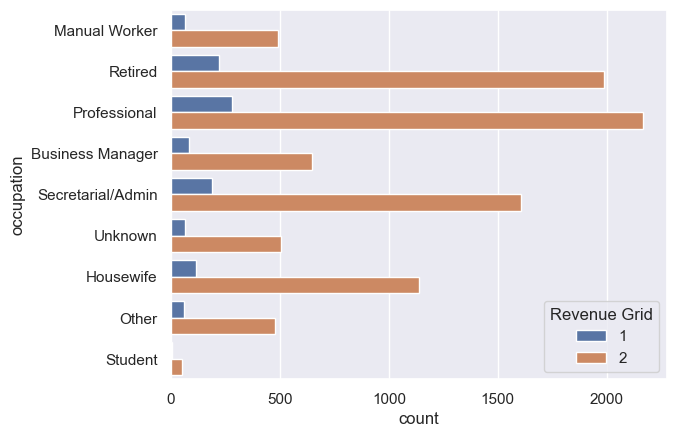

In [41]:
sns.countplot(y=df['occupation'],hue=df['Revenue Grid'])

<AxesSubplot:xlabel='count', ylabel='status'>

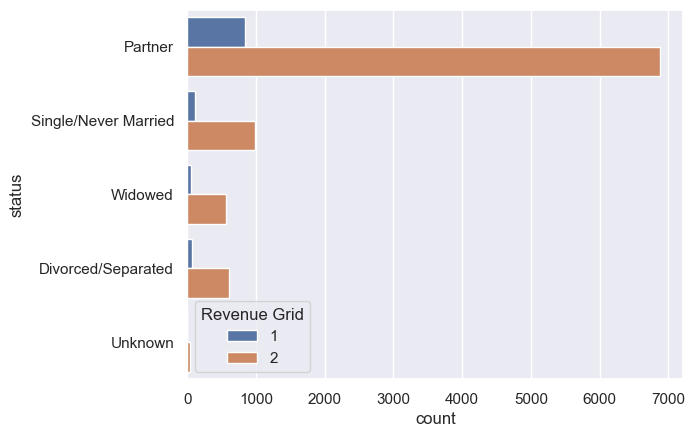

In [42]:
sns.countplot(y=df['status'],hue=df['Revenue Grid'])

<AxesSubplot:xlabel='count', ylabel='occupation_partner'>

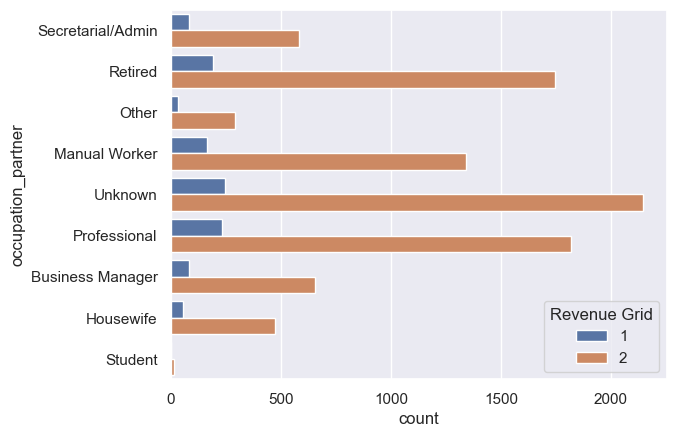

In [43]:
sns.countplot(y=df['occupation_partner'],hue=df['Revenue Grid'])

<AxesSubplot:xlabel='count', ylabel='home_status'>

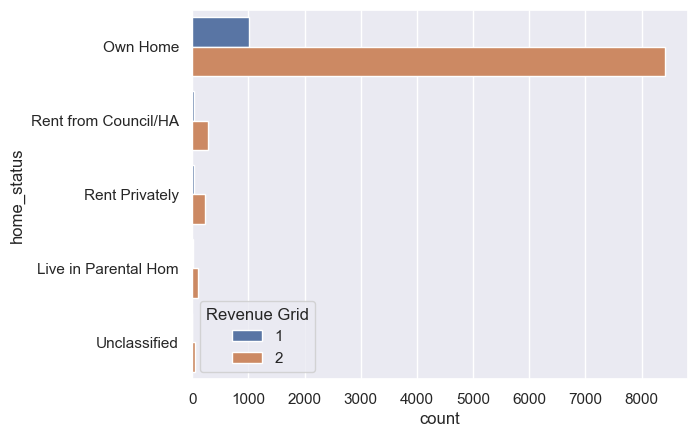

In [44]:
sns.countplot(y=df['home_status'],hue=df['Revenue Grid'])

<AxesSubplot:xlabel='count', ylabel='family_income'>

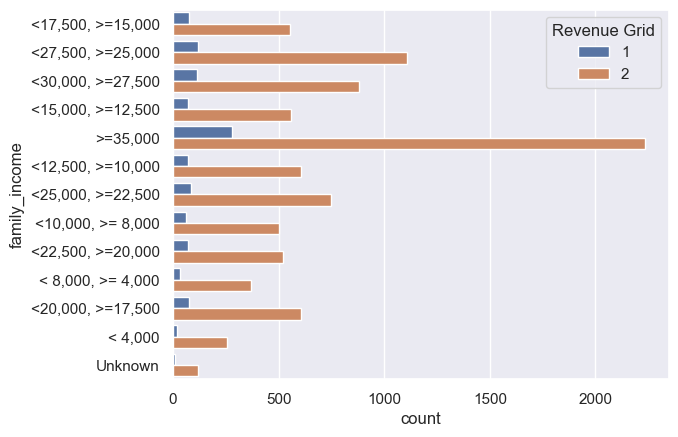

In [45]:
sns.countplot(y=df['family_income'],hue=df['Revenue Grid'])

<AxesSubplot:xlabel='count', ylabel='region'>

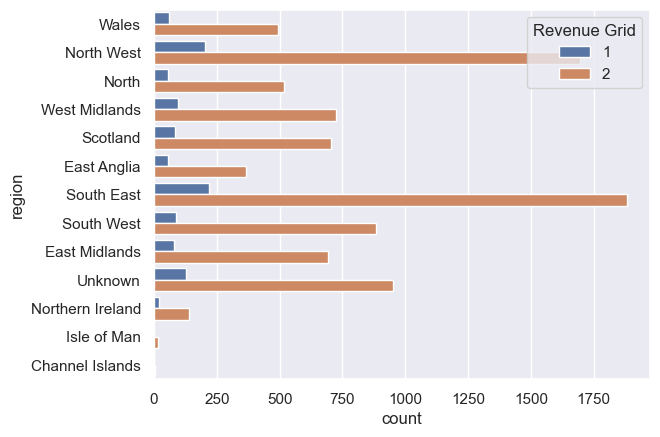

In [46]:
sns.countplot(y=df['region'],hue=df['Revenue Grid'])

In [47]:
df=pd.get_dummies(data=df,columns=['children','age_band','occupation','status','occupation_partner','home_status','family_income','region'],drop_first=True)

#### As the classification of dependent variable is 1,2 .Now we are converting it into basic classification form  0,1

In [48]:
df['Revenue Grid']=df['Revenue Grid'].replace(2,0)

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10155 entries, 0 to 10154
Data columns (total 82 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   self_employed                         10155 non-null  int8   
 1   self_employed_partner                 10155 non-null  int8   
 2   year_last_moved                       10155 non-null  int64  
 3   Average Credit Card Transaction       10155 non-null  float64
 4   Balance Transfer                      10155 non-null  float64
 5   Term Deposit                          10155 non-null  float64
 6   Life Insurance                        10155 non-null  float64
 7   Medical Insurance                     10155 non-null  float64
 8   Average A/C Balance                   10155 non-null  float64
 9   Personal Loan                         10155 non-null  float64
 10  Investment in Mutual Fund             10155 non-null  float64
 11  Investment Tax 

## Split data into independent and dependent variables

In [50]:
x=df.drop('Revenue Grid',axis=1)
y=df[['Revenue Grid']]

In [51]:
y

,Revenue Grid
0,1
1,0
2,0
3,0
4,0
...,...
10150,0
10151,0
10152,0
10153,0


## Split data into Train and Test Data

In [52]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,stratify=y)

In [53]:
y_test

,Revenue Grid
7835,0
8753,0
10039,1
5071,0
7563,0
...,...
7313,0
7436,0
3395,0
3424,0


## Feature Scaling 

In [54]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_sc=sc.fit_transform(x_train)

In [55]:
x_sc

array([[-0.27514762, -0.35256033,  0.17156361, ..., -0.34759766,
        -0.24371356, -0.292436  ],
       [-0.27514762,  2.83639395, -1.0338132 , ..., -0.34759766,
        -0.24371356, -0.292436  ],
       [-0.27514762, -0.35256033,  0.57335588, ..., -0.34759766,
        -0.24371356, -0.292436  ],
       ...,
       [-0.27514762, -0.35256033, -0.79273784, ..., -0.34759766,
        -0.24371356, -0.292436  ],
       [-0.27514762, -0.35256033,  0.0108467 , ..., -0.34759766,
        -0.24371356, -0.292436  ],
       [-0.27514762, -0.35256033,  0.8947897 , ..., -0.34759766,
        -0.24371356,  3.41955163]])

## Imbalance Data Handling

In [56]:
y_train

,Revenue Grid
7070,0
3565,0
2045,0
7930,0
6441,0
...,...
9614,0
5801,1
5055,0
385,0


In [57]:
y_train['Revenue Grid'].value_counts()

0    6802
1     814
Name: Revenue Grid, dtype: int64

In [58]:
from imblearn.over_sampling import SMOTE
smote=SMOTE()
x_smote,y_smote=smote.fit_resample(x_sc,y_train)

In [59]:
y_smote['Revenue Grid'].value_counts()

0    6802
1    6802
Name: Revenue Grid, dtype: int64

## Model Building and Evaluation

In [60]:
import xgboost
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB,BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

In [61]:
#logistic
logistic=LogisticRegression()

In [62]:
#Randomforest
rf=RandomForestClassifier()

In [63]:
#Boosting
gdb=GradientBoostingClassifier()

In [64]:
#NAIVEBAYES
gnb=GaussianNB()
bnb=BernoulliNB()

In [65]:
#K nearest neighbor
knn=KNeighborsClassifier()

In [66]:
#SVM
svm=SVC()

In [67]:
models=[(logistic,'logistic',1),(rf,'randomforest',2),(gdb,'Gradient boosting',3),(gnb,'GaussianNB',4),(bnb,'BernoulliNB',5),(knn,'KNN',6),(svm,'SVC',7)]

In [90]:
for model,model_name,i in models:
    model.fit(x_smote,y_smote)
    y_pred_train=model.predict(x_smote)
    y_pred_test=model.predict(x_test)
    print('===================================================================')
    print(f'Cross validation of {model_name}')
    Train_acc=cross_val_score(model,x_smote,y_smote,cv=5)
    Test_acc=cross_val_score(model,x_test,y_test,cv=5)

    print('Train accuracy:',Train_acc)
    print('Test accuracy:',Test_acc)

Cross validation of logistic
Train accuracy: [0.90628445 0.92024991 0.92355752 0.92098493 0.92463235]
Test accuracy: [0.95669291 0.9488189  0.92913386 0.94685039 0.93885602]
Cross validation of randomforest
Train accuracy: [0.91951488 0.98272694 0.97941933 0.98125689 0.97904412]
Test accuracy: [0.9488189  0.94094488 0.93700787 0.92519685 0.94477318]
Cross validation of Gradient boosting
Train accuracy: [0.90995957 0.96729144 0.95810364 0.96471885 0.96911765]
Test accuracy: [0.9507874  0.95669291 0.94291339 0.95275591 0.9566075 ]
Cross validation of GaussianNB
Train accuracy: [0.5755237  0.56890849 0.56964351 0.5630283  0.57904412]
Test accuracy: [0.82283465 0.77362205 0.82086614 0.74409449 0.82248521]
Cross validation of BernoulliNB
Train accuracy: [0.7170158  0.74200662 0.74090408 0.74972437 0.72867647]
Test accuracy: [0.82480315 0.81496063 0.82874016 0.82086614 0.83234714]
Cross validation of KNN
Train accuracy: [0.85667034 0.86622565 0.86438809 0.86218302 0.86580882]
Test accuracy: 

In [68]:
for model,model_name,i in models:
    model.fit(x_smote,y_smote)
    y_pred_train=model.predict(x_smote)
    y_pred_test=model.predict(x_test)
    print('===================================================================')
    print(f'Cross validation of {model_name}')
    Train_acc=cross_val_score(model,x_smote,y_smote,cv=5).mean()
    Test_acc=cross_val_score(model,x_test,y_test,cv=5).mean()
    varience=abs(Train_acc-Test_acc)
    print('Train accuracy:',Train_acc)
    print('Test accuracy:',Test_acc)
    print('varience:',varience)
    if varience>10 :
        print(f'Overfitting {model_name}')

Cross validation of logistic
Train accuracy: 0.9191418325875004
Test accuracy: 0.9440704157542438
varience: 0.0249285831667434
Cross validation of randomforest
Train accuracy: 0.9678781049354692
Test accuracy: 0.9377727562161239
varience: 0.030105348719345337
Cross validation of Gradient boosting
Train accuracy: 0.953911759301295
Test accuracy: 0.9519514202736492
varience: 0.0019603390276458077
Cross validation of GaussianNB
Train accuracy: 0.57122962470545
Test accuracy: 0.7967805059870474
varience: 0.2255508812815974
Cross validation of BernoulliNB
Train accuracy: 0.7356654668482607
Test accuracy: 0.8243434437559211
varience: 0.08867797690766033
Cross validation of KNN
Train accuracy: 0.8630551862420823
Test accuracy: 0.9464341735389585
varience: 0.0833789872968762
Cross validation of SVC
Train accuracy: 0.9773596158419267
Test accuracy: 0.9090178446629082
varience: 0.0683417711790184


In [79]:
#classification report
from sklearn.metrics import classification_report
for model,model_name,i in models:
    model.fit(x_train,y_train)
    y_pred_train=model.predict(x_smote)
    y_pred_test=model.predict(x_test)
    print('===================================================================')
    print(f'Classification report of {model_name}')
    print('====================================================================')
    Train_cvr=classification_report(y_smote,y_pred_train)
    Test_cvr=classification_report(y_test,y_pred_test)
    print('Train classification report:',Train_cvr)
    print('===================================================================')
    print('Test classification report:',Test_cvr)

Classification report of logistic
Train classification report:               precision    recall  f1-score   support

           0       0.76      0.45      0.57      6802
           1       0.61      0.86      0.71      6802

    accuracy                           0.66     13604
   macro avg       0.69      0.66      0.64     13604
weighted avg       0.69      0.66      0.64     13604

Test classification report:               precision    recall  f1-score   support

           0       0.95      0.98      0.97      2267
           1       0.82      0.61      0.70       272

    accuracy                           0.94      2539
   macro avg       0.89      0.80      0.83      2539
weighted avg       0.94      0.94      0.94      2539

Classification report of randomforest
Train classification report:               precision    recall  f1-score   support

           0       0.50      1.00      0.67      6802
           1       0.00      0.00      0.00      6802

    accuracy            

Confusion matrix of logistic


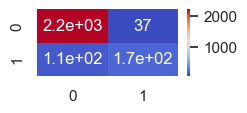

Confusion matrix of randomforest


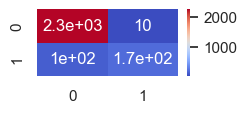

Confusion matrix of Gradient boosting


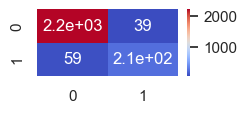

Confusion matrix of GaussianNB


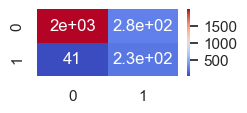

Confusion matrix of BernoulliNB


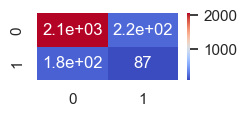

Confusion matrix of KNN


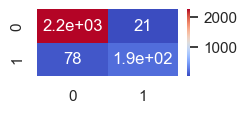

Confusion matrix of SVC


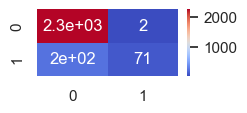

In [81]:
#Confusion matrix:
from sklearn.metrics import confusion_matrix
for model,model_name,i in models:
    model.fit(x_train,y_train)
    y_pred_train=model.predict(x_smote)
    y_pred_test=model.predict(x_test)
    cm=confusion_matrix(y_test,y_pred_test)
    print(f'Confusion matrix of {model_name}')
    plt.figure(figsize=(5,5))
    plt.subplot(5,2,i)
    sns.heatmap(cm,annot=True,cmap='coolwarm')
    plt.show()

In [71]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

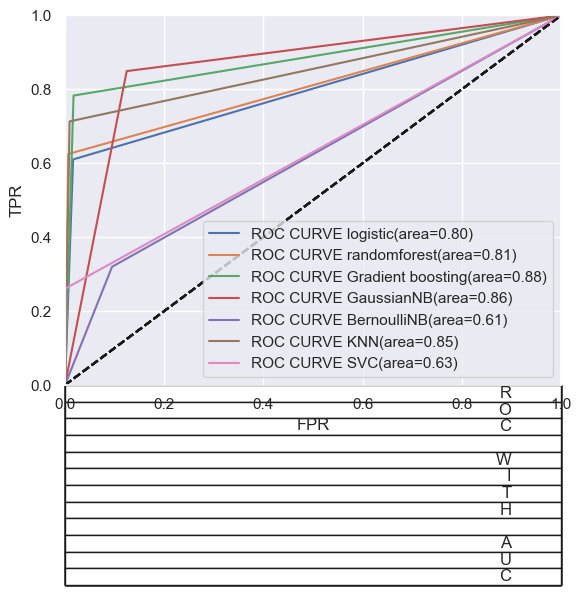

In [82]:
for model,model_name,i in models:
    model.fit(x_train,y_train)
    y_pred_train=model.predict(x_smote)
    y_pred_test=model.predict(x_test)
    roc_auc=roc_auc_score(y_test,y_pred_test)
    fpr,tpr,thresholds=roc_curve(y_test,y_pred_test)
    plt.plot(fpr,tpr,label=f'ROC CURVE {model_name}(area=%0.2f)'%roc_auc)
    plt.plot([0,1],[0,1],'k--')
    plt.xlim([0.0,1.0])
    plt.ylim([0.0,1.0])
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.table('ROC WITH AUC')
    plt.legend(loc='lower right')
plt.show()

In [83]:
from sklearn.metrics import accuracy_score

In [84]:
acc_list=[]
for model,model_name,i in models:
    model.fit(x_train,y_train)
    y_pred_train=model.predict(x_smote)
    y_pred_test=model.predict(x_test)
    test_acc=accuracy_score(y_test,y_pred_test)
    acc_list.append(test_acc)

In [85]:
model_name=['logistic','randomforest','Gradient boosting','GaussianNB','BernoulliNB','KNN','SVC']

In [86]:
metrics_df=pd.DataFrame({'model_name':model_name,'Accuracy':acc_list})

In [87]:
metrics_df

,model_name,Accuracy
0,logistic,0.943679
1,randomforest,0.958251
2,Gradient boosting,0.961402
3,GaussianNB,0.872785
4,BernoulliNB,0.842458
5,KNN,0.961008
6,SVC,0.920047


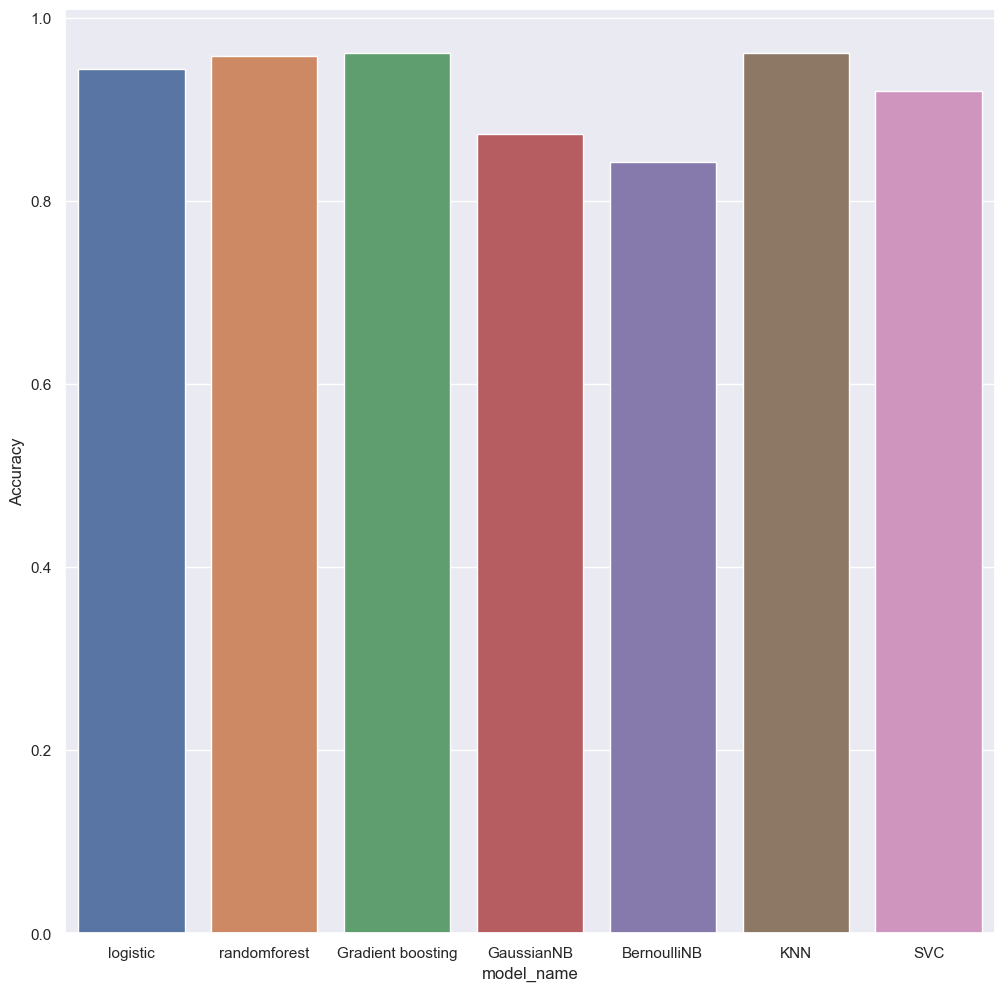

In [88]:
plt.figure(figsize=(12,12))
sns.barplot(x='model_name',y='Accuracy',data=metrics_df)
plt.show()

## Summary:

#### After building mutliple algorithms , RANDOMFOREST & GRADIENTBOOSTING performed best with appreciable accuracies and very negligable varience

#### BEST MODEL: RANDOMFOREST , GRADIENTBOOSTING